# Import Libraries

In [35]:
import numpy as np
import xgboost
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
import seaborn as sns

# Load Data

In [36]:
loan_data = pd.read_csv('loan_data.csv')
loan_data

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,all_other,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1
9574,0,all_other,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1
9575,0,debt_consolidation,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1
9576,0,home_improvement,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1


# Transform Data

In [37]:
# one hot encoding for purpose feature
one_hot = OneHotEncoder(sparse_output = False)
one_hot_purp = pd.DataFrame(one_hot.fit_transform(loan_data['purpose'].values.reshape(-1, 1)), columns = one_hot.get_feature_names_out(['purpose']))

loan_data = pd.concat([loan_data, one_hot_purp], axis = 1)
loan_data = loan_data.drop('purpose', axis = 1)
loan_data

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0
9574,0,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0
9575,0,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0
9576,0,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0


# Visualizations

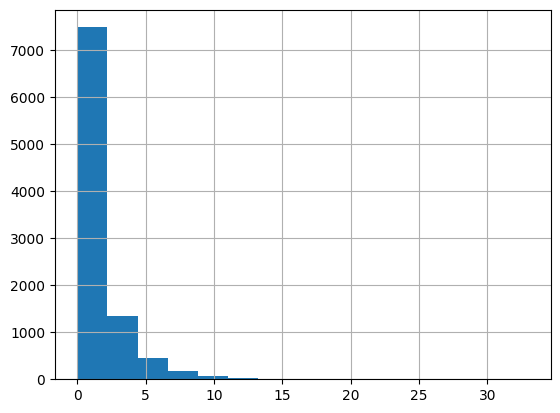

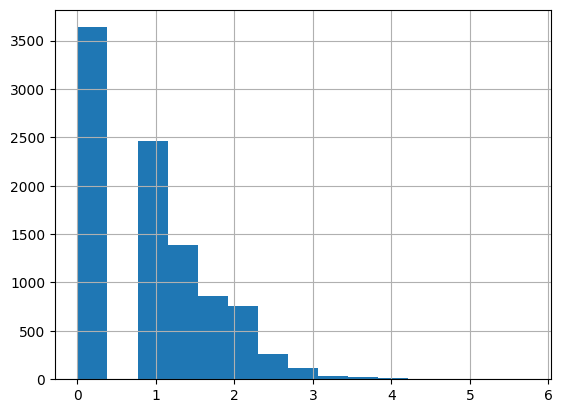

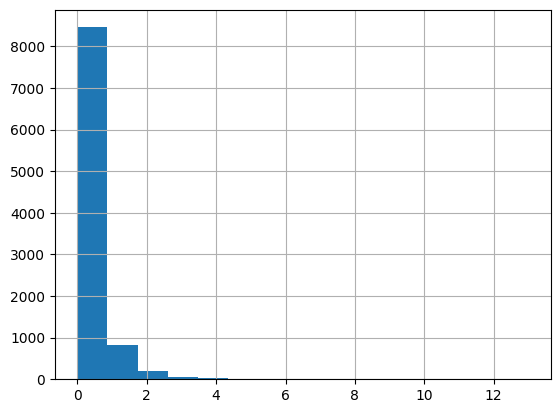

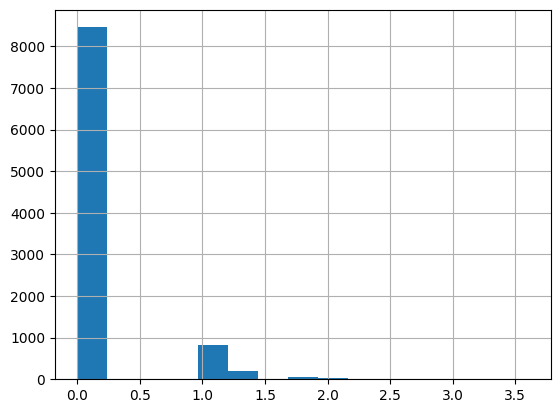

In [38]:
log_feats = ['inq.last.6mths', 'delinq.2yrs']
# 'revol.bal'
ss = StandardScaler()
for feat, i in zip(log_feats, range(len(log_feats))):
    plt.figure(2 * i)
    (loan_data[feat]).hist(bins = 15)

    plt.figure(2 * i + 1)
    #pd.Series(ss.fit_transform([loan_data[feat]])[0]).plot(kind = 'bar')
    (loan_data[feat]).apply(np.sqrt).hist(bins=15)


<Axes: >

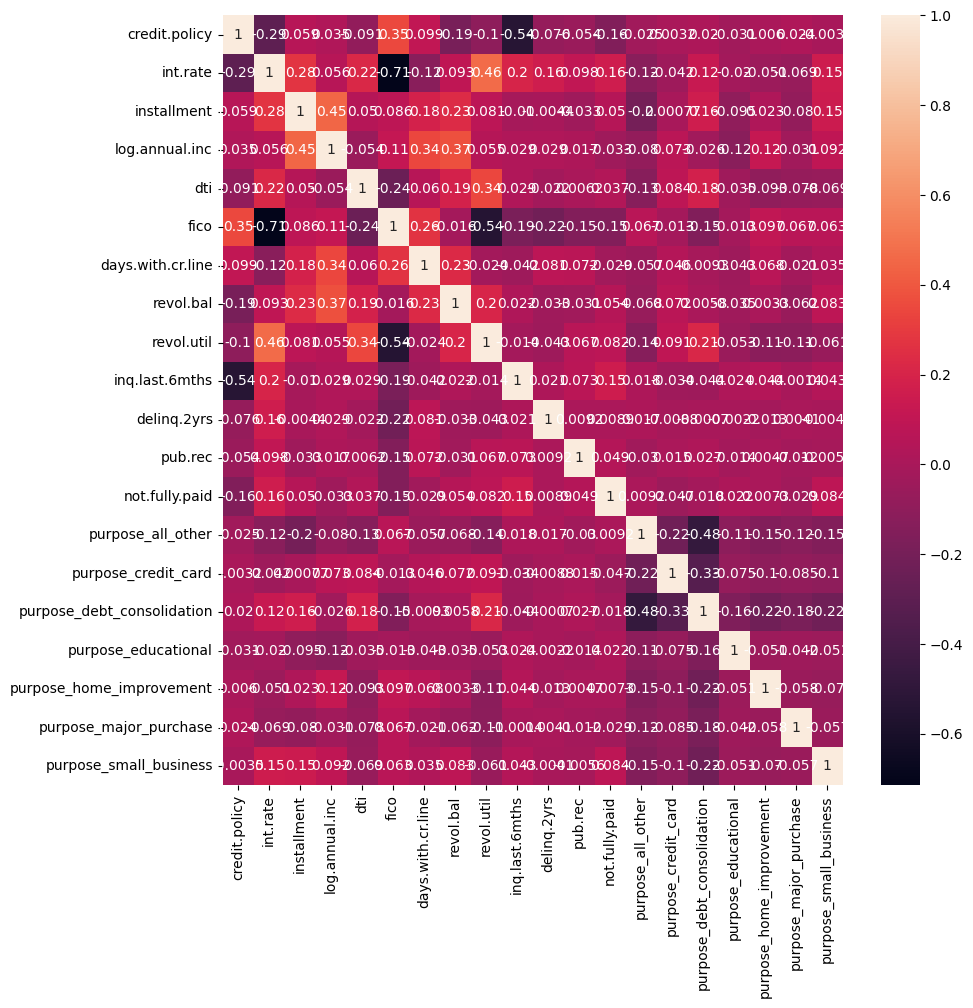

In [40]:
plt.figure(figsize=(10, 10))
sns.heatmap(loan_data.corr(), annot = True)

# Preprocessing

In [41]:
loan_data_trans = loan_data.copy()
for x in ['inq.last.6mths', 'delinq.2yrs', 'revol.bal']:
    loan_data_trans[x] = loan_data_trans[x].apply(lambda x: np.log(x + 1))


for x in ['installment', 'days.with.cr.line', 'log.annual.inc']:
    loan_data_trans['std.' + x] = (loan_data_trans[x] - loan_data_trans[x].mean()) / loan_data_trans[x].std()

# Get Train and Test Data

In [42]:
features = loan_data[[col for col in loan_data.columns if col != 'not.fully.paid']]
trans_features = loan_data_trans[[col for col in loan_data_trans.columns if col != 'not.fully.paid']]
target = loan_data['not.fully.paid']

x_train, x_test, y_train, y_test, x_train_trans, x_test_trans = train_test_split(features, target, trans_features, test_size = 0.25, stratify = target)

In [43]:
# select features w highest f-score
ten_best = SelectKBest(k = 10)
fifteen_best = SelectKBest(k = 15)

ten_best.fit(features, target)
ten_best_feats = ten_best.get_feature_names_out(features.columns)

ten_best.fit(trans_features, target)
ten_best_feats_trans = ten_best.get_feature_names_out(trans_features.columns)

fifteen_best.fit(features, target)
fifteen_best_feats = fifteen_best.get_feature_names_out(features.columns)

fifteen_best.fit(trans_features, target)
fifteen_best_feats_trans = fifteen_best.get_feature_names_out(trans_features.columns)

all_feats = list(features.columns)

In [48]:
def fit_model(model, feats, x_train, x_test):
    model.fit(x_train[feats], y_train)
    preds = model.predict(x_test[feats])
    print('model:', type(model))
    print('features:', feats)
    print('accuracy:', accuracy_score(preds, y_test))
    print('precision:', precision_score(preds, y_test))
    print('f1 score:', f1_score(preds, y_test))
    print('recall:', recall_score(preds, y_test))
    print('mean cross val score:', cross_val_score(model, x_test[feats], y_test).mean(), '\n\n\n')
    
    

# XGBoost Classifier

In [49]:
xgbClassifier = xgboost.XGBClassifier()

# XGBoost classifier trained on the with three different sets of features using the transformed features
print('untransformed')
fit_model(xgbClassifier, all_feats, x_train, x_test)
fit_model(xgbClassifier, ten_best_feats, x_train, x_test)
fit_model(xgbClassifier, fifteen_best_feats, x_train, x_test)

# XGBoost classifier trained on the with three different sets of features using the transformed features
print('transformed')
fit_model(xgbClassifier, all_feats, x_train_trans, x_test_trans)
fit_model(xgbClassifier, ten_best_feats, x_train_trans, x_test_trans)
fit_model(xgbClassifier, fifteen_best_feats, x_train_trans, x_test_trans)


untransformed
model: <class 'xgboost.sklearn.XGBClassifier'>
features: ['credit.policy', 'int.rate', 'installment', 'log.annual.inc', 'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util', 'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'purpose_all_other', 'purpose_credit_card', 'purpose_debt_consolidation', 'purpose_educational', 'purpose_home_improvement', 'purpose_major_purchase', 'purpose_small_business']
accuracy: 0.8250521920668058
precision: 0.07049608355091384
f1 score: 0.1141649048625793
recall: 0.3
mean cross val score: 0.8167014613778706 



model: <class 'xgboost.sklearn.XGBClassifier'>
features: ['credit.policy' 'int.rate' 'installment' 'fico' 'revol.bal' 'revol.util'
 'inq.last.6mths' 'pub.rec' 'purpose_credit_card' 'purpose_small_business']
accuracy: 0.8208768267223382
precision: 0.08877284595300261
f1 score: 0.13682092555331993
recall: 0.2982456140350877
mean cross val score: 0.8183716075156575 



model: <class 'xgboost.sklearn.XGBClassifier'>
features: ['credit.p

# SVM


In [50]:
svc_scale_pipe = Pipeline([
    ('scale', StandardScaler()),
    ('svc', SVC())
])

# SVM classifier trained on the with three different sets of features using the transformed features
print('untransformed')
fit_model(svc_scale_pipe, all_feats, x_train, x_test)
fit_model(svc_scale_pipe, ten_best_feats, x_train, x_test)
fit_model(svc_scale_pipe, fifteen_best_feats, x_train, x_test)

# SVM classifier trained on the with three different sets of features using the transformed features
print('transformed')
fit_model(svc_scale_pipe, all_feats, x_train_trans, x_test_trans)
fit_model(svc_scale_pipe, ten_best_feats, x_train_trans, x_test_trans)
fit_model(svc_scale_pipe, fifteen_best_feats, x_train_trans, x_test_trans)

untransformed
model: <class 'sklearn.pipeline.Pipeline'>
features: ['credit.policy', 'int.rate', 'installment', 'log.annual.inc', 'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util', 'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'purpose_all_other', 'purpose_credit_card', 'purpose_debt_consolidation', 'purpose_educational', 'purpose_home_improvement', 'purpose_major_purchase', 'purpose_small_business']
accuracy: 0.8413361169102297
precision: 0.007832898172323759
f1 score: 0.015544041450777202
recall: 1.0
mean cross val score: 0.8400835073068894 



model: <class 'sklearn.pipeline.Pipeline'>
features: ['credit.policy' 'int.rate' 'installment' 'fico' 'revol.bal' 'revol.util'
 'inq.last.6mths' 'pub.rec' 'purpose_credit_card' 'purpose_small_business']
accuracy: 0.8405010438413362
precision: 0.007832898172323759
f1 score: 0.015463917525773195
recall: 0.6
mean cross val score: 0.8388308977035491 



model: <class 'sklearn.pipeline.Pipeline'>
features: ['credit.policy' 'int.rate' 'ins

# Logisitc Regression

In [52]:
logreg_scale_pipe = Pipeline([
    ('scale', StandardScaler()),
    ('logreg', LogisticRegression())
])

# Logistic Regression classifier trained on the with three different sets of features using the transformed features
print('untransformed')
fit_model(logreg_scale_pipe, all_feats, x_train, x_test)
fit_model(logreg_scale_pipe, ten_best_feats, x_train, x_test)
fit_model(logreg_scale_pipe, fifteen_best_feats, x_train, x_test)

# Logistic Regression classifier trained on the with three different sets of features using the transformed features
print('transformed')
fit_model(logreg_scale_pipe, all_feats, x_train_trans, x_test_trans)
fit_model(logreg_scale_pipe, ten_best_feats, x_train_trans, x_test_trans)
fit_model(logreg_scale_pipe, fifteen_best_feats, x_train_trans, x_test_trans)

untransformed
model: <class 'sklearn.pipeline.Pipeline'>
features: ['credit.policy', 'int.rate', 'installment', 'log.annual.inc', 'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util', 'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'purpose_all_other', 'purpose_credit_card', 'purpose_debt_consolidation', 'purpose_educational', 'purpose_home_improvement', 'purpose_major_purchase', 'purpose_small_business']
accuracy: 0.8400835073068893
precision: 0.02610966057441253
f1 score: 0.04962779156327543
recall: 0.5
mean cross val score: 0.8413361169102297 



model: <class 'sklearn.pipeline.Pipeline'>
features: ['credit.policy' 'int.rate' 'installment' 'fico' 'revol.bal' 'revol.util'
 'inq.last.6mths' 'pub.rec' 'purpose_credit_card' 'purpose_small_business']
accuracy: 0.8396659707724425
precision: 0.013054830287206266
f1 score: 0.025380710659898473
recall: 0.45454545454545453
mean cross val score: 0.8405010438413362 



model: <class 'sklearn.pipeline.Pipeline'>
features: ['credit.policy' '